In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


Retrieving covid data and co2 data

In [9]:
totalCases = pd.read_csv('covid/total_cases_global.csv', usecols = ['date','World'])
co2Daily = pd.read_csv('co2_data/co2-ppm-daily_csv.csv')

co2Frame = co2Daily[co2Daily.date.isin(totalCases.date)].reset_index()
co2Frame = co2Frame[['date','value']]
covidFrame = totalCases[totalCases.date.isin(co2Daily.date)].reset_index()
covidFrame = covidFrame[['date','World']]


In [10]:
covidFrame.head()

,date,World
0,12/31/2019,27
1,1/1/2020,27
2,1/3/2020,44
3,1/4/2020,44
4,1/5/2020,59


In [11]:
co2Frame.head()

,date,value
0,12/31/2019,413.20
1,1/1/2020,412.64
2,1/3/2020,413.01
3,1/4/2020,413.24
4,1/5/2020,413.58


Plot w/ regression 

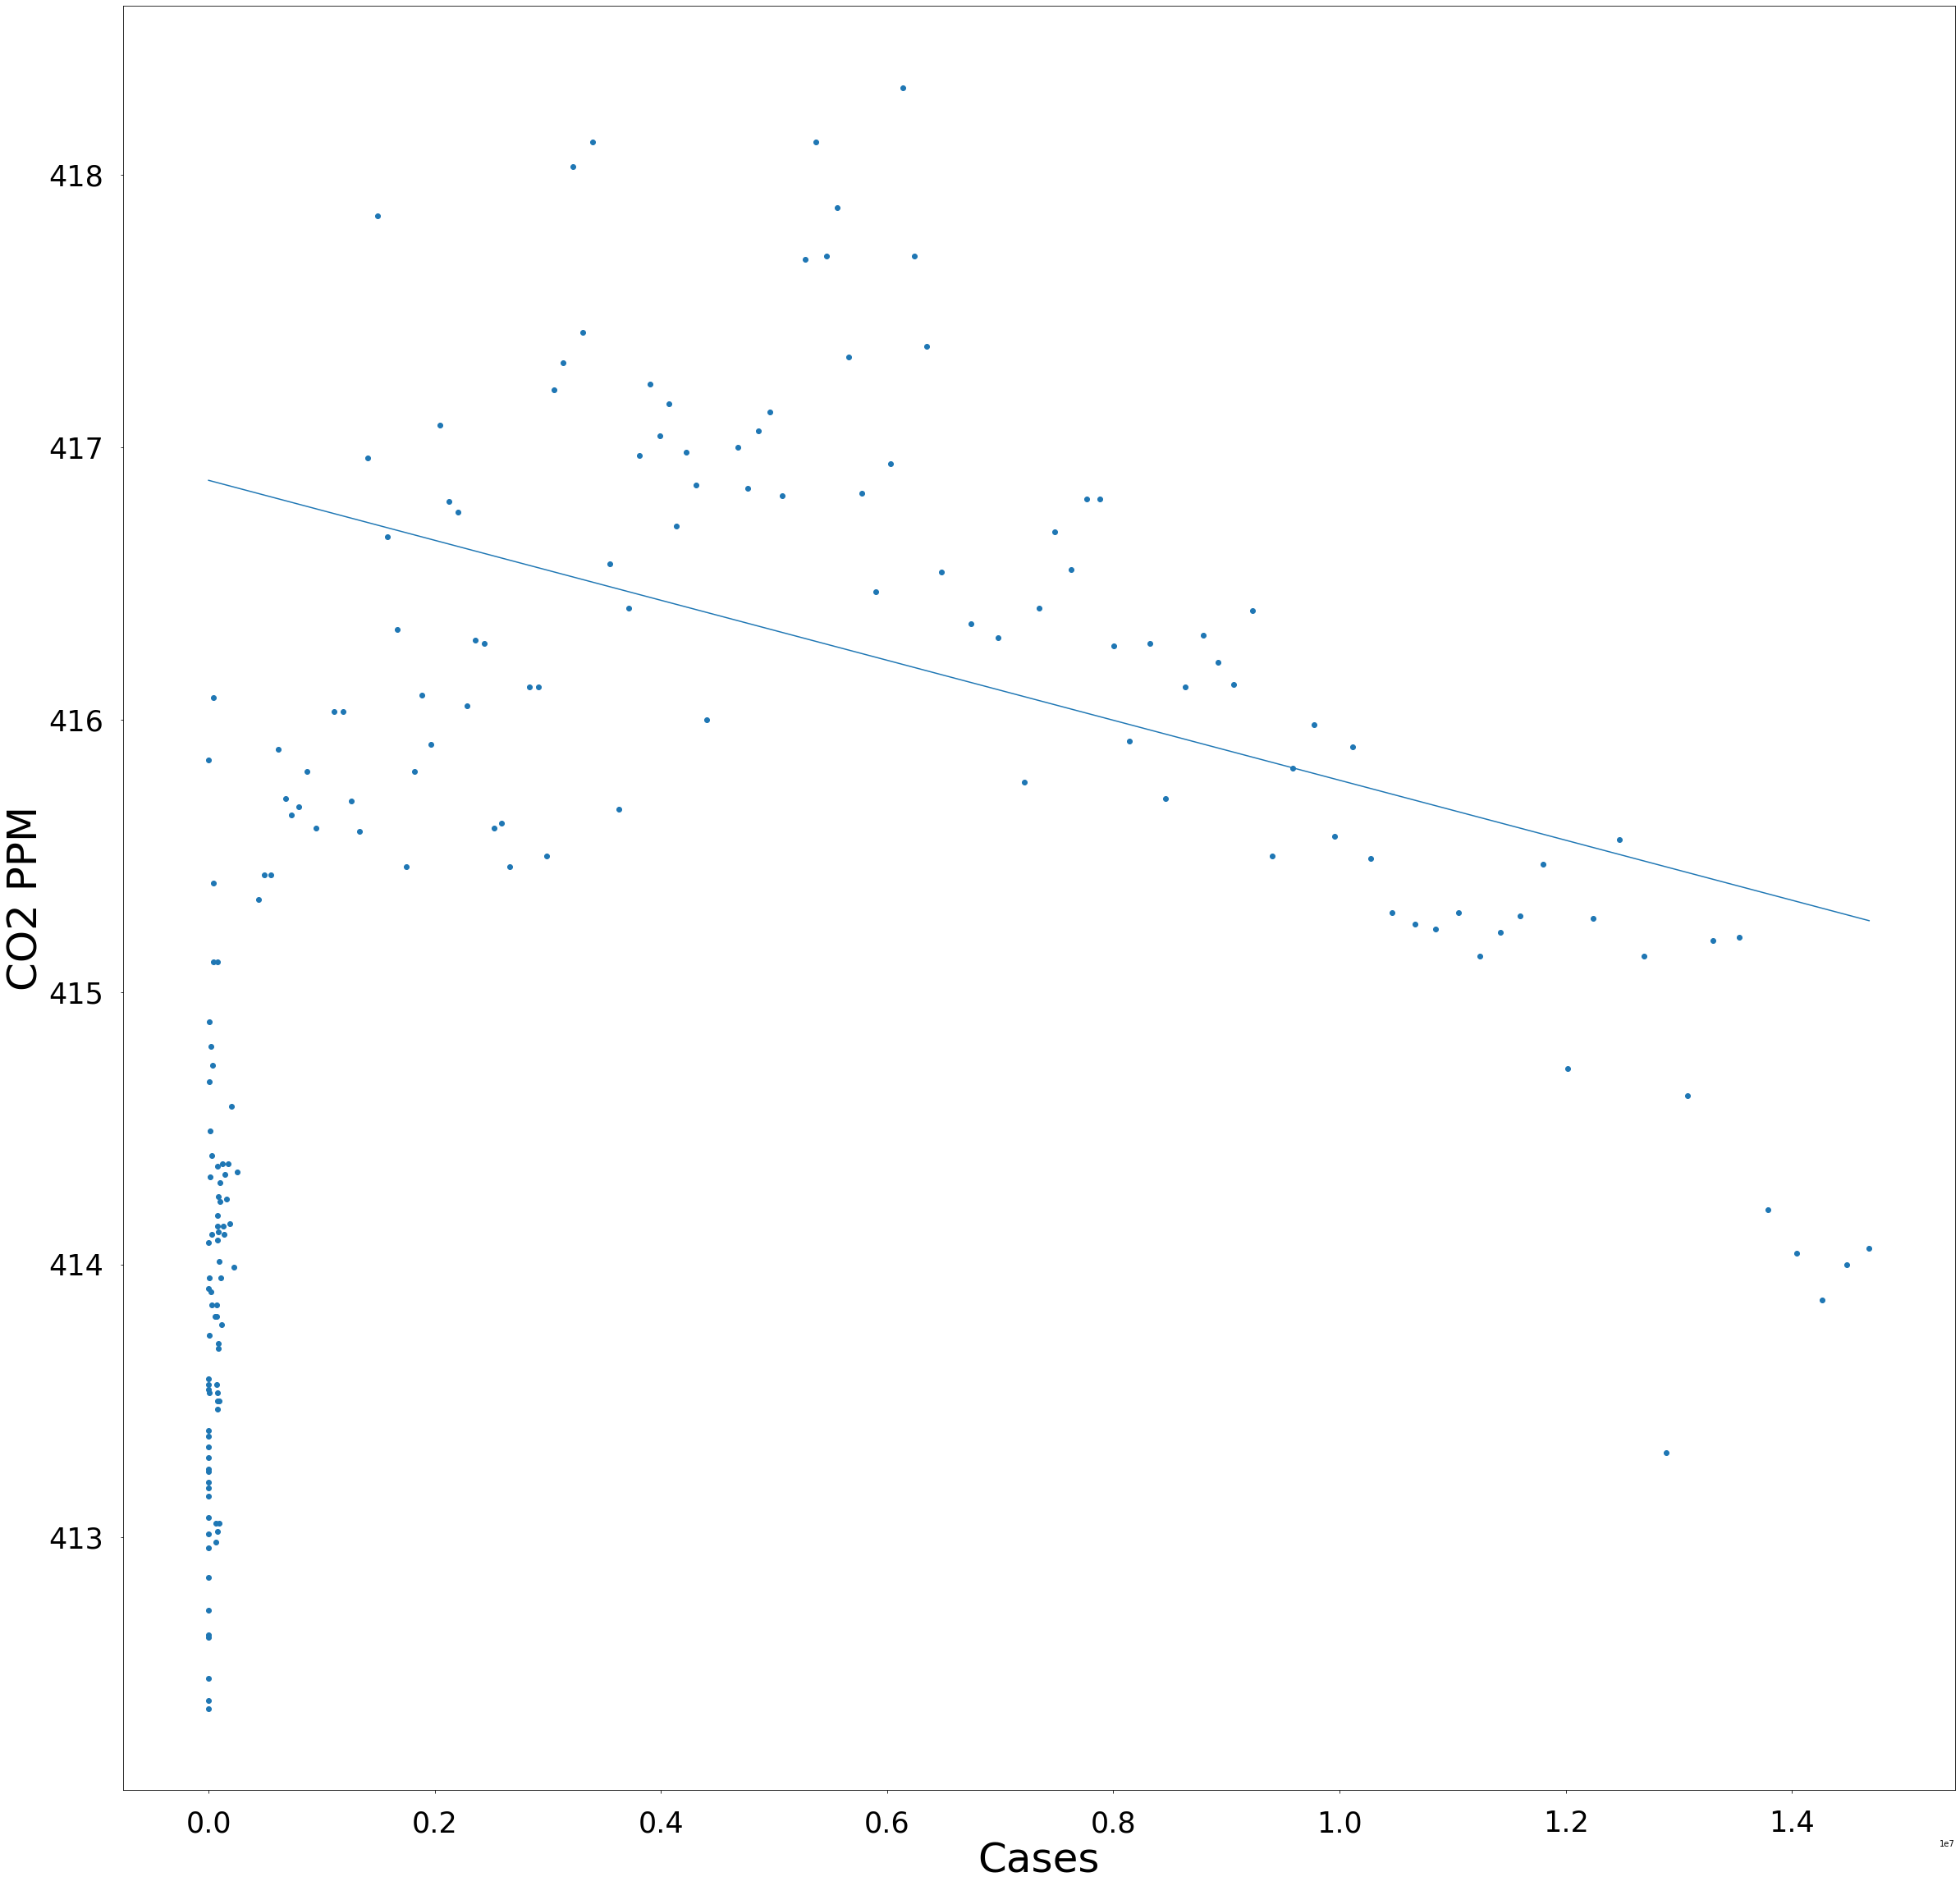

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [16]:
plt.figure(figsize=(40,40))

x = covidFrame.World
y = co2Frame.value

np_covidFrame = np.array(covidFrame.World).reshape(-1,1)
np_co2Frame = np.array(co2Frame.value).reshape(-1,1)

covidset = np.array(covidFrame.World[80:])
co2set = np.array(co2Frame.value[80:])

#training sets
covid_train = covidset[::4].reshape(-1, 1)
co2set_train = co2set[::4].reshape(-1, 1)

#train regression
regr = linear_model.LinearRegression()
regr.fit(covid_train, co2set_train)

#projections
co2_predictions = regr.predict(np_covidFrame)

#plot
plt.plot(np_covidFrame, co2_predictions)

plt.scatter(x, y)

plt.xlabel('Cases', fontsize='50')
plt.ylabel('CO2 PPM', fontsize='50')
plt.tick_params(axis='both', labelsize='35', pad=20)

plt.show()

#line info


Plot w/out regression

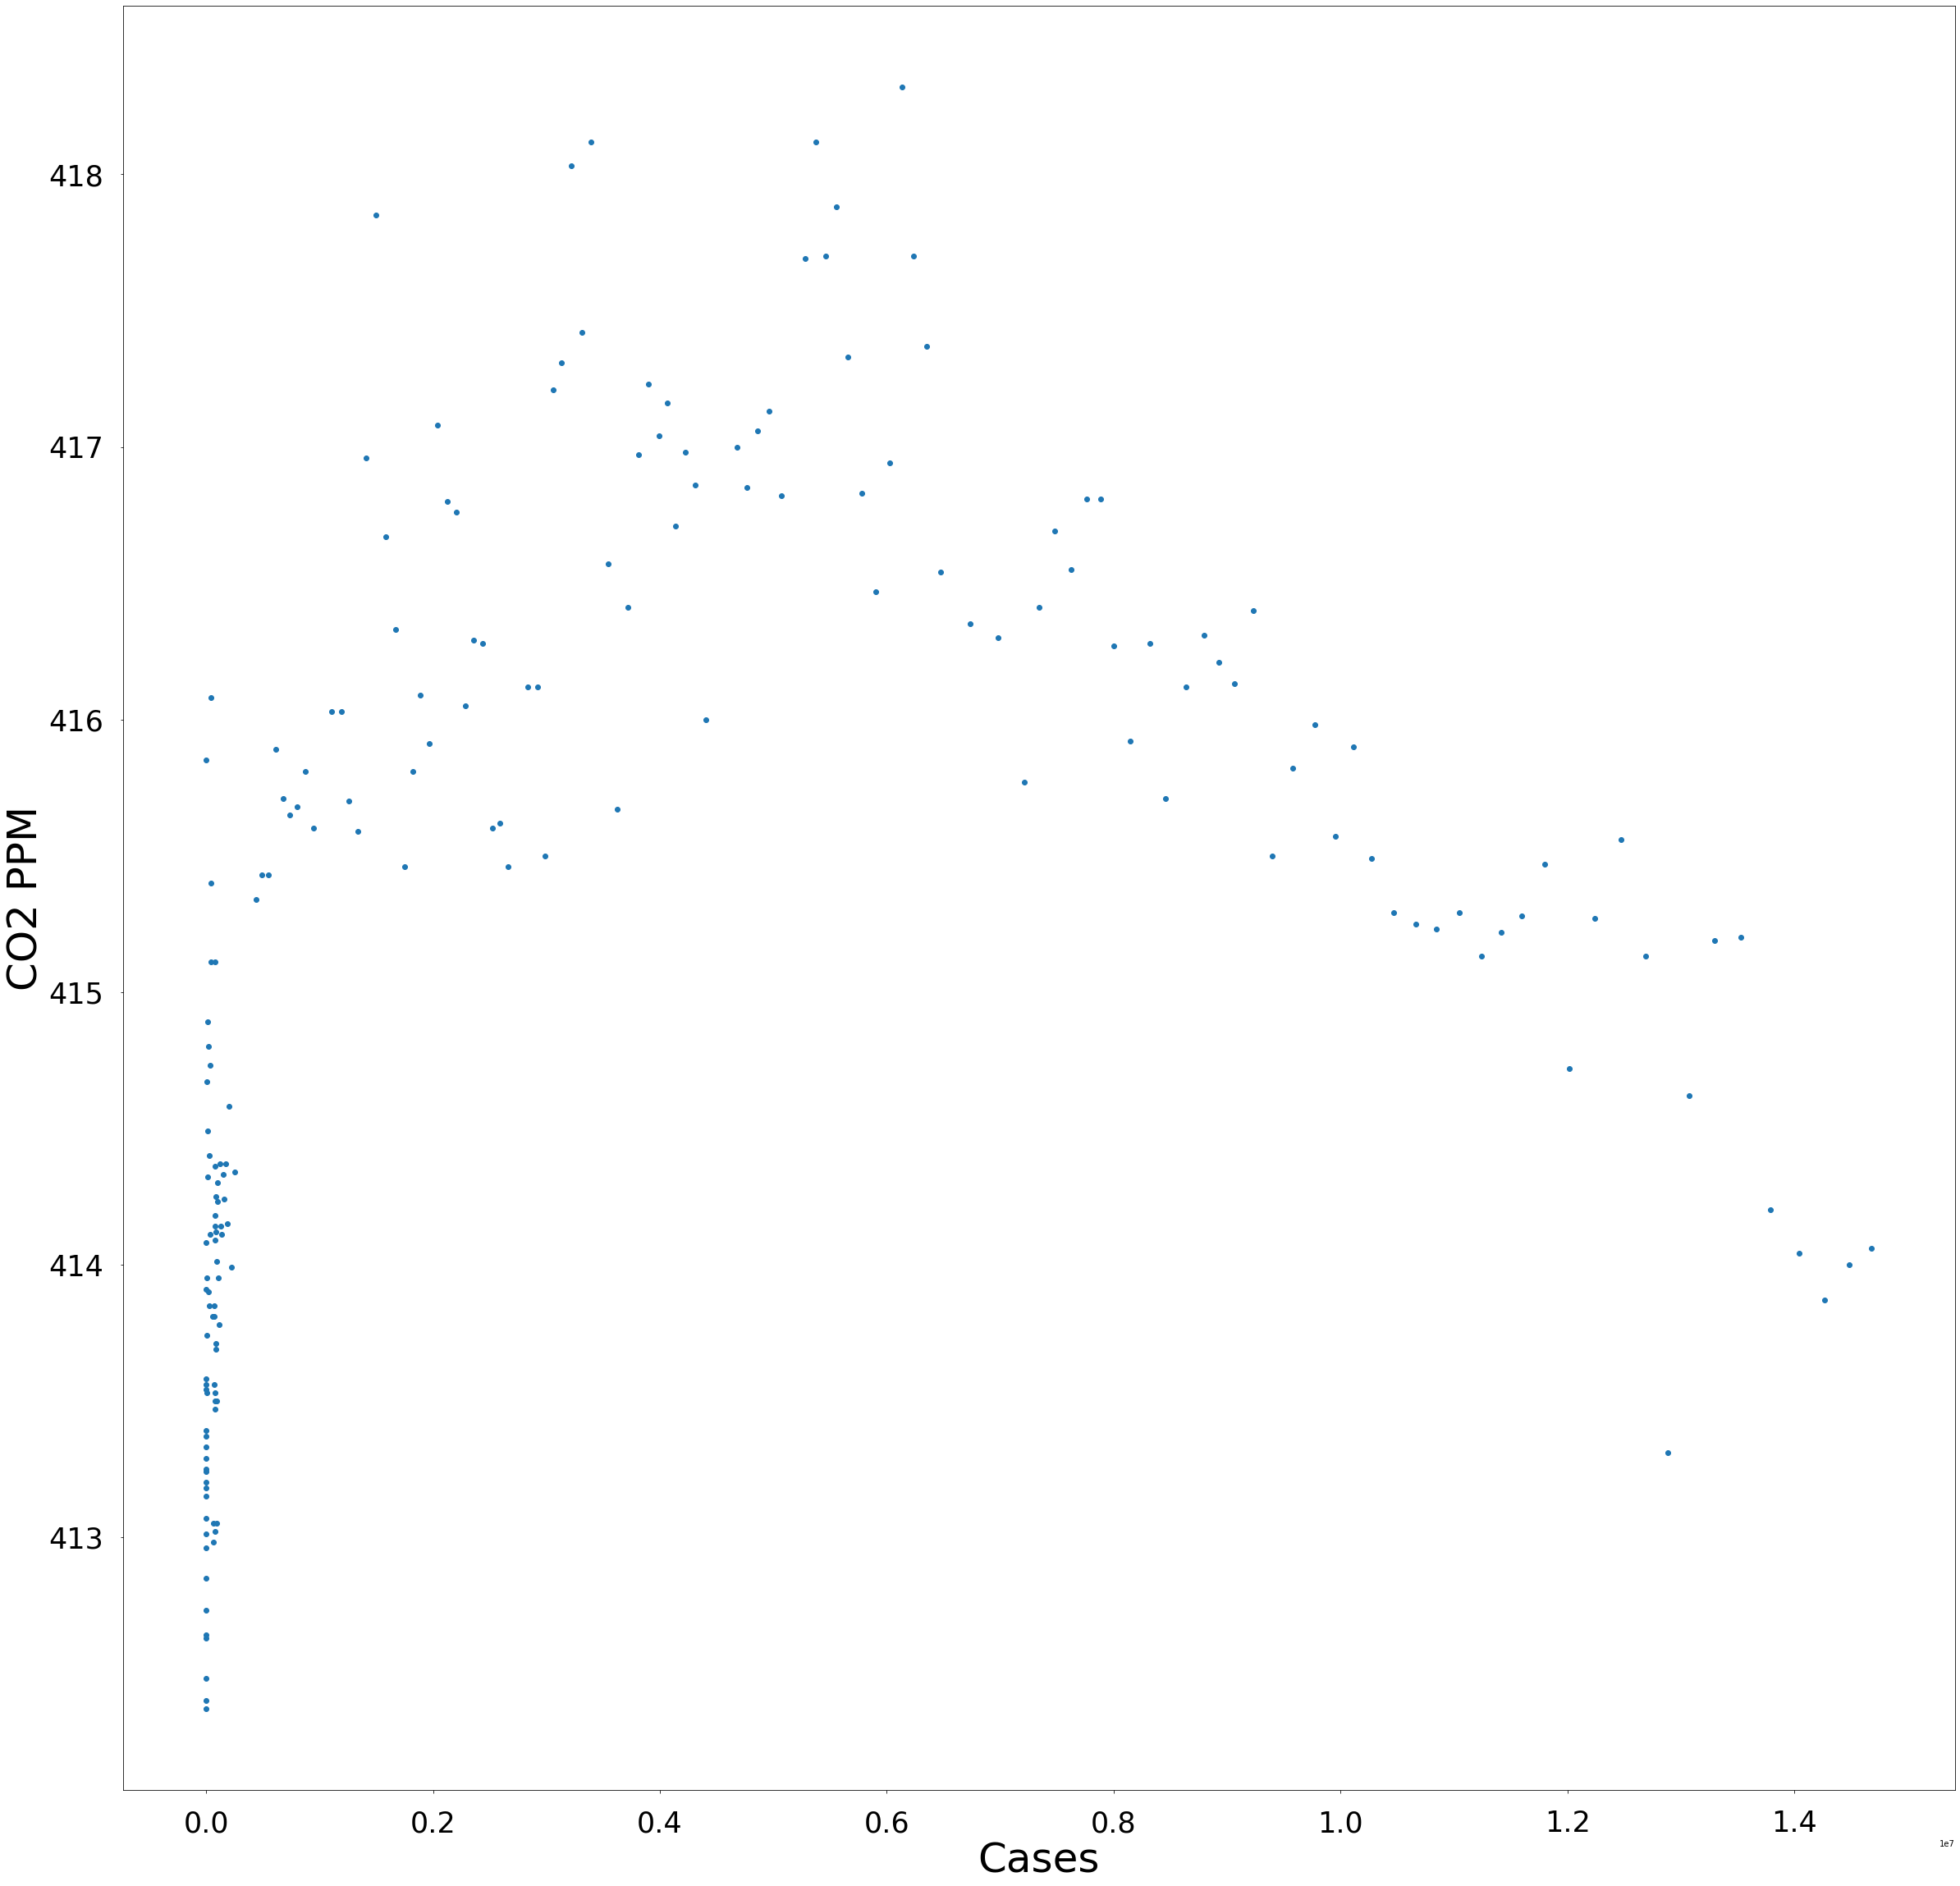

In [14]:
plt.figure(figsize=(40,40))

x = covidFrame.World
y = co2Frame.value

plt.scatter(x,y)

plt.xlabel('Cases', fontsize='50')
plt.ylabel('CO2 PPM', fontsize='50')
plt.tick_params(axis='both', labelsize='35', pad=20)

plt.show()